**In this notebook, I want to check wether the mean difference of ratings between the highest rated movie genre and the lowest rated one is significant or by chance**

**The null hypothesis will be that both distribution of animation movies with highest ratings and western movies with lowest ratings have the same underlying mean but not necessarily the same distribution**

In [23]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style('white')
sns.set_context('talk')

In [15]:
# loading the pickle file
with open('genres_year_rate.pkl', 'rb') as file:
    genres = pickle.load(file)

In [16]:
genres, rate, year = zip(*genres)

In [17]:
df = pd.DataFrame({"genres":genres, "year":year, "rate":rate})

In [18]:
df.head()

,genres,year,rate
0,Documentary,1878,6.2
1,Documentary,1883,5.4
2,Comedy,1890,4.3
3,Documentary,1891,3.3
4,Comedy,1892,6.1


In [117]:
grouped = df.groupby('genres').mean().sort_values(by = 'rate', ascending=False)
grouped

,year,rate
genres,,
Animation,1996.547219,6.291553
History,1989.375727,6.168241
War,1979.636782,6.046667
Drama,1990.673925,5.920809
Crime,1988.337632,5.883494
Music,1985.386650,5.878967
Documentary,2002.899922,5.866051
Mystery,1989.325696,5.823200
Romance,1987.867757,5.811528


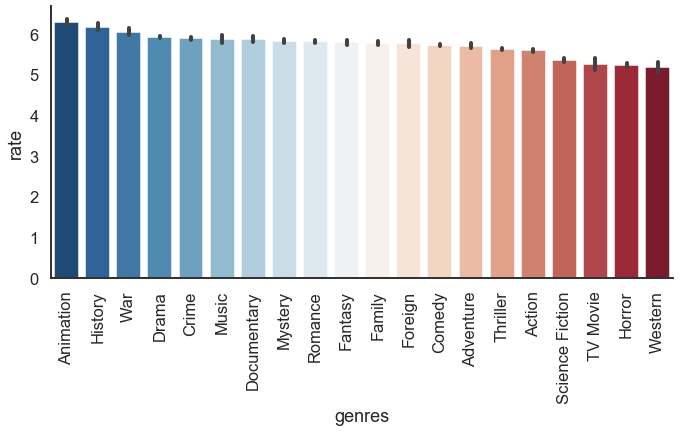

In [112]:
sns.catplot(x = 'genres', y = "rate", data=df, kind='bar', order = grouped.index,height=5, aspect = 2, palette='RdBu_r')
plt.xticks(rotation=90)
#plt.title("Mean ratings for different movie genres")
#plt.tight_layout()
plt.savefig('rating_bar.jpg', bbox_inches='tight')

In [91]:
# rating distribution of western and animation movies
western = df[df.genres == 'Western'].rate.values
animation = df[df.genres == 'Animation'].rate.values

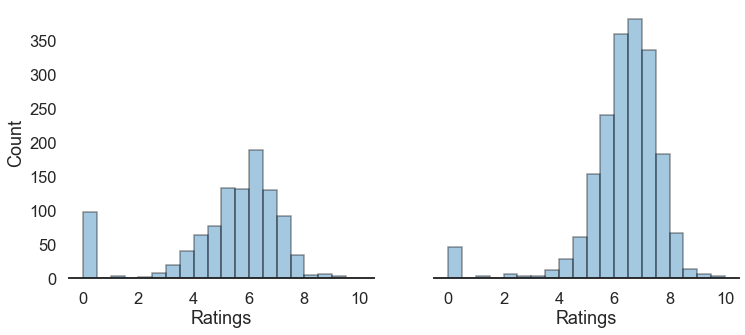

In [114]:
# plotting the distribution of ratings in both genres
fig , axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.distplot(western, kde=False, ax=axes[0], bins=20, hist_kws=dict(edgecolor='k'))
axes[0].set( xlabel="Ratings", ylabel='Count')
sns.despine(top=True, right=True, left=True, ax=axes[0])

sns.distplot(animation, kde=False, ax=axes[1], bins=20, hist_kws=dict(edgecolor='k'))
axes[1].set( xlabel="Ratings")
sns.despine(top=True, right=True, left=True, ax=axes[1])
plt.savefig("rating_dist.jpg", bbox_inches='tight')

In [93]:
# distribution of means for 10000 different samples for western movies
western_means = [np.mean(np.random.choice(western, size=len(western))) for _ in range(10000)]
w_mean = np.mean(western_means)

In [94]:
# distribution of means for 10000 different samples for animation movies
animation_means = [np.mean(np.random.choice(animation, size = len(animation))) for _ in range(10000)]
a_mean = np.mean(animation_means)

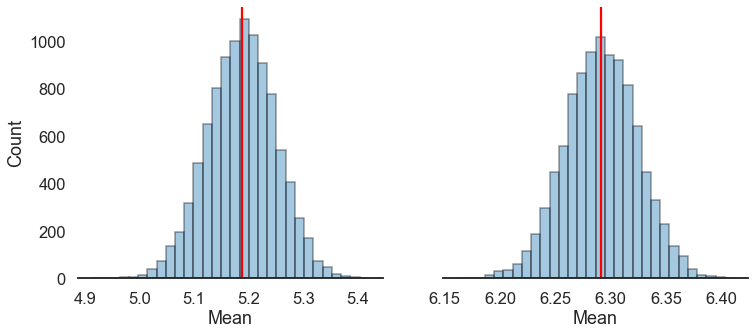

In [115]:
fig1, axes1 = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# western means distribution
sns.distplot(western_means, bins=30, ax=axes1[0], hist_kws=dict(edgecolor='k'), kde=False)
_=axes1[0].axvline(w_mean, color='red')
axes1[0].set( xlabel = "Mean", ylabel='Count')
sns.despine(top=True, right=True, left=True, ax=axes1[0])

# animation means distribution
sns.distplot(animation_means, bins=30, kde=False, hist_kws=dict(edgecolor='k'), ax=axes1[1])
axes1[1].axvline(a_mean, color='red')
axes1[1].set( xlabel = "Mean")
sns.despine(top=True, left=True, right=True, ax=axes1[1])
plt.savefig("mean_dist.jpg", bbox_inches='tight')

**If the two genres had the same underlying mean, what would be the chance that we get the means difference, the same as what in the above bar plot? so I shift both distributions to the same mean and find the p-value of  getting the mean difference as high as what we have right now**

In [96]:
# concatenating the two samples and taking the overall mean for western and animation
means_concat = np.mean(np.concatenate((western, animation)))

In [97]:
# shifting both distribution, so they have the same mean
western_shifted = western - w_mean + means_concat
animation_shifted = animation - a_mean + means_concat

In [98]:
# drawing 10000 samples of each distribution and calculating the mean for each one
w_shifted_samples = np.array([np.mean(np.random.choice(western_shifted, size=len(western_shifted))) for _ in range(10000)])
a_shifted_samples = np.array([np.mean(np.random.choice(animation_shifted, size=len(animation_shifted))) for _ in range(10000)])

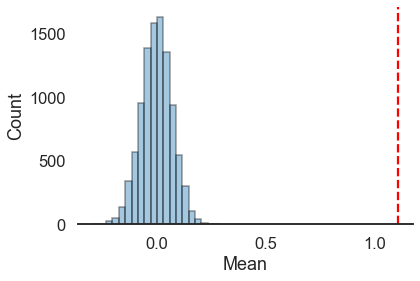

In [116]:
# drawing the distribution of mean differences and calculate the p-value for the observed difference
sns.distplot(w_shifted_samples - a_shifted_samples, kde=False, hist_kws=dict(edgecolor='k'), bins=20)
sns.despine(top=True, right=True, left=True)
plt.axvline(a_mean-w_mean, linestyle='--', color='red')
#plt.title("Mean distribution of shifted samples")
plt.xlabel("Mean")
plt.ylabel("Count")
plt.savefig("p-val", bbox_inches="tight")

In [100]:
p_val = np.sum(w_shifted_samples - a_shifted_samples > a_mean - w_mean)/len(w_shifted_samples)
print("The p-value: {}".format(p_val))

The p-value: 0.0


**Looking at the p-value, which is almost zero, we can reject the null hypothesis that both distributions have the same rating means and we can say that animation movies have higher ratings**

In [108]:
plt.savefig?